# Keras VGG16 ground-up - DEPRECATED

https://builtin.com/machine-learning/vgg16

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
%%shell
mkdir vgg16
mkdir vgg16/train
mkdir vgg16/test

mkdir vgg16/train/01_TUMOR
mkdir vgg16/test/01_TUMOR

mkdir vgg16/train/02_STROMA
mkdir vgg16/test/02_STROMA

mkdir vgg16/train/03_COMPLEX
mkdir vgg16/test/03_COMPLEX

mkdir vgg16/train/04_LYMPHO
mkdir vgg16/test/04_LYMPHO

mkdir vgg16/train/05_DEBRIS
mkdir vgg16/test/05_DEBRIS

mkdir vgg16/train/06_MUCOSA
mkdir vgg16/test/06_MUCOSA

mkdir vgg16/train/07_ADIPOSE
mkdir vgg16/test/07_ADIPOSE

mkdir vgg16/train/08_EMPTY
mkdir vgg16/test/08_EMPTY

In [ ]:
%%shell

find data/Kather_texture_2016_image_tiles_5000/01_TUMOR -maxdepth 1 -type f -print0 | head -z -n 100 | xargs -0 -r -- cp -t vgg16/train/01_TUMOR --
find data/Kather_texture_2016_image_tiles_5000/01_TUMOR -maxdepth 1 -type f -print0 | tail -z -n 100 | xargs -0 -r -- cp -t vgg16/test/01_TUMOR --

find data/Kather_texture_2016_image_tiles_5000/02_STROMA -maxdepth 1 -type f -print0 | head -z -n 100 | xargs -0 -r -- cp -t vgg16/train/02_STROMA --
find data/Kather_texture_2016_image_tiles_5000/02_STROMA -maxdepth 1 -type f -print0 | tail -z -n 100 | xargs -0 -r -- cp -t vgg16/test/02_STROMA --

find data/Kather_texture_2016_image_tiles_5000/03_COMPLEX -maxdepth 1 -type f -print0 | head -z -n 100 | xargs -0 -r -- cp -t vgg16/train/03_COMPLEX --
find data/Kather_texture_2016_image_tiles_5000/03_COMPLEX -maxdepth 1 -type f -print0 | tail -z -n 100 | xargs -0 -r -- cp -t vgg16/test/03_COMPLEX --

find data/Kather_texture_2016_image_tiles_5000/04_LYMPHO -maxdepth 1 -type f -print0 | head -z -n 100 | xargs -0 -r -- cp -t vgg16/train/04_LYMPHO --
find data/Kather_texture_2016_image_tiles_5000/04_LYMPHO -maxdepth 1 -type f -print0 | tail -z -n 100 | xargs -0 -r -- cp -t vgg16/test/04_LYMPHO --

find data/Kather_texture_2016_image_tiles_5000/05_DEBRIS -maxdepth 1 -type f -print0 | head -z -n 100 | xargs -0 -r -- cp -t vgg16/train/05_DEBRIS --
find data/Kather_texture_2016_image_tiles_5000/05_DEBRIS -maxdepth 1 -type f -print0 | tail -z -n 100 | xargs -0 -r -- cp -t vgg16/test/05_DEBRIS --

find data/Kather_texture_2016_image_tiles_5000/06_MUCOSA -maxdepth 1 -type f -print0 | head -z -n 100 | xargs -0 -r -- cp -t vgg16/train/06_MUCOSA --
find data/Kather_texture_2016_image_tiles_5000/06_MUCOSA -maxdepth 1 -type f -print0 | tail -z -n 100 | xargs -0 -r -- cp -t vgg16/test/06_MUCOSA --

find data/Kather_texture_2016_image_tiles_5000/07_ADIPOSE -maxdepth 1 -type f -print0 | head -z -n 100 | xargs -0 -r -- cp -t vgg16/train/07_ADIPOSE --
find data/Kather_texture_2016_image_tiles_5000/07_ADIPOSE -maxdepth 1 -type f -print0 | tail -z -n 100 | xargs -0 -r -- cp -t vgg16/test/07_ADIPOSE --

find data/Kather_texture_2016_image_tiles_5000/08_EMPTY -maxdepth 1 -type f -print0 | head -z -n 100 | xargs -0 -r -- cp -t vgg16/train/08_EMPTY --
find data/Kather_texture_2016_image_tiles_5000/08_EMPTY -maxdepth 1 -type f -print0 | tail -z -n 100 | xargs -0 -r -- cp -t vgg16/test/08_EMPTY --

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="vgg16/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="vgg16/test", target_size=(224,224))

Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=8, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata,steps_per_epoch=20, validation_data= testdata, validation_steps=10,epochs=30,callbacks=[checkpoint,early])

Epoch 1/30


 1/20 [>.............................] - ETA: 10s - loss: 0.4633 - accuracy: 0.8750

 2/20 [==>...........................] - ETA: 7s - loss: 0.6591 - accuracy: 0.7656 

 3/20 [===>..........................] - ETA: 6s - loss: 0.5751 - accuracy: 0.7917

 4/20 [=====>........................] - ETA: 6s - loss: 0.5666 - accuracy: 0.8047

 5/20 [======>.......................] - ETA: 6s - loss: 0.5550 - accuracy: 0.8062

 6/20 [========>.....................] - ETA: 5s - loss: 0.5732 - accuracy: 0.7917

 7/20 [=========>....................] - ETA: 5s - loss: 0.5963 - accuracy: 0.7679

 8/20 [===========>..................] - ETA: 4s - loss: 0.5730 - accuracy: 0.7656

 9/20 [============>.................] - ETA: 4s - loss: 0.5913 - accuracy: 0.7535

10/20 [==============>...............] - ETA: 4s - loss: 0.5862 - accuracy: 0.7406

11/20 [===============>..............] - ETA: 3s - loss: 0.5782 - accuracy: 0.7386

12/20 [=================>............] - ETA: 3s - loss: 0.5840 - accuracy: 0.7344

13/20 [==================>...........] - ETA: 2s - loss: 0.5707 - accuracy: 0.7404

14/20 [====================>.........] - ETA: 2s - loss: 0.5715 - accuracy: 0.7500

15/20 [=====================>........] - ETA: 2s - loss: 0.5644 - accuracy: 0.7563

16/20 [=======================>......] - ETA: 1s - loss: 0.5769 - accuracy: 0.7578

17/20 [========================>.....] - ETA: 1s - loss: 0.5897 - accuracy: 0.7518

18/20 [==========================>...] - ETA: 0s - loss: 0.5785 - accuracy: 0.7604

19/20 [===========================>..] - ETA: 0s - loss: 0.5726 - accuracy: 0.7599

20/20 [==============================] - ETA: 0s - loss: 0.5704 - accuracy: 0.7641

20/20 [==============================] - 10s 480ms/step - loss: 0.5704 - accuracy: 0.7641 - val_loss: 1.0012 - val_accuracy: 0.6938
Epoch 2/30


 1/20 [>.............................] - ETA: 8s - loss: 0.1853 - accuracy: 1.0000

 2/20 [==>...........................] - ETA: 7s - loss: 0.2900 - accuracy: 0.8906

 3/20 [===>..........................] - ETA: 7s - loss: 0.2950 - accuracy: 0.8750

 4/20 [=====>........................] - ETA: 6s - loss: 0.4031 - accuracy: 0.8750

 5/20 [======>.......................] - ETA: 6s - loss: 0.4888 - accuracy: 0.8250

 6/20 [========>.....................] - ETA: 5s - loss: 0.4713 - accuracy: 0.8177

 7/20 [=========>....................] - ETA: 5s - loss: 0.5933 - accuracy: 0.7857

 8/20 [===========>..................] - ETA: 4s - loss: 0.6697 - accuracy: 0.7500

 9/20 [============>.................] - ETA: 4s - loss: 0.6714 - accuracy: 0.7465

10/20 [==============>...............] - ETA: 4s - loss: 0.6792 - accuracy: 0.7375

11/20 [===============>..............] - ETA: 3s - loss: 0.6799 - accuracy: 0.7358

12/20 [=================>............] - ETA: 3s - loss: 0.6669 - accuracy: 0.7422

13/20 [==================>...........] - ETA: 2s - loss: 0.6591 - accuracy: 0.7380

14/20 [====================>.........] - ETA: 2s - loss: 0.6588 - accuracy: 0.7344

15/20 [=====================>........] - ETA: 2s - loss: 0.6968 - accuracy: 0.7167

16/20 [=======================>......] - ETA: 1s - loss: 0.7054 - accuracy: 0.7031

17/20 [========================>.....] - ETA: 1s - loss: 0.7189 - accuracy: 0.6949

18/20 [==========================>...] - ETA: 0s - loss: 0.7502 - accuracy: 0.6858

19/20 [===========================>..] - ETA: 0s - loss: 0.7517 - accuracy: 0.6809

20/20 [==============================] - ETA: 0s - loss: 0.7478 - accuracy: 0.6797

20/20 [==============================] - 10s 482ms/step - loss: 0.7478 - accuracy: 0.6797 - val_loss: 1.0924 - val_accuracy: 0.5437
Epoch 3/30


 1/20 [>.............................] - ETA: 8s - loss: 0.7410 - accuracy: 0.6875

 2/20 [==>...........................] - ETA: 7s - loss: 0.7828 - accuracy: 0.6875

 3/20 [===>..........................] - ETA: 7s - loss: 0.7628 - accuracy: 0.6771

 4/20 [=====>........................] - ETA: 6s - loss: 0.6939 - accuracy: 0.6953

 5/20 [======>.......................] - ETA: 6s - loss: 0.6531 - accuracy: 0.7250

 6/20 [========>.....................] - ETA: 5s - loss: 0.6578 - accuracy: 0.7135

 7/20 [=========>....................] - ETA: 5s - loss: 0.6519 - accuracy: 0.7098

 8/20 [===========>..................] - ETA: 4s - loss: 0.6539 - accuracy: 0.7031

 9/20 [============>.................] - ETA: 4s - loss: 0.6597 - accuracy: 0.7049

10/20 [==============>...............] - ETA: 4s - loss: 0.6462 - accuracy: 0.7156

11/20 [===============>..............] - ETA: 3s - loss: 0.6391 - accuracy: 0.7188

12/20 [=================>............] - ETA: 3s - loss: 0.6251 - accuracy: 0.7240

13/20 [==================>...........] - ETA: 2s - loss: 0.6053 - accuracy: 0.7356

14/20 [====================>.........] - ETA: 2s - loss: 0.5938 - accuracy: 0.7455

15/20 [=====================>........] - ETA: 2s - loss: 0.5854 - accuracy: 0.7542

16/20 [=======================>......] - ETA: 1s - loss: 0.5790 - accuracy: 0.7617

17/20 [========================>.....] - ETA: 1s - loss: 0.5757 - accuracy: 0.7647

18/20 [==========================>...] - ETA: 0s - loss: 0.5645 - accuracy: 0.7726

19/20 [===========================>..] - ETA: 0s - loss: 0.5536 - accuracy: 0.7747

20/20 [==============================] - ETA: 0s - loss: 0.5462 - accuracy: 0.7750

20/20 [==============================] - 10s 477ms/step - loss: 0.5462 - accuracy: 0.7750 - val_loss: 1.4920 - val_accuracy: 0.5250
Epoch 4/30


 1/20 [>.............................] - ETA: 8s - loss: 0.4715 - accuracy: 0.7500

 2/20 [==>...........................] - ETA: 7s - loss: 0.3887 - accuracy: 0.8125

 3/20 [===>..........................] - ETA: 7s - loss: 0.3653 - accuracy: 0.8542

 4/20 [=====>........................] - ETA: 6s - loss: 0.3917 - accuracy: 0.8359

 5/20 [======>.......................] - ETA: 6s - loss: 0.4305 - accuracy: 0.8313

 6/20 [========>.....................] - ETA: 5s - loss: 0.4989 - accuracy: 0.8177

 7/20 [=========>....................] - ETA: 5s - loss: 0.4748 - accuracy: 0.8214

 8/20 [===========>..................] - ETA: 4s - loss: 0.4767 - accuracy: 0.8242

 9/20 [============>.................] - ETA: 4s - loss: 0.5152 - accuracy: 0.7917

10/20 [==============>...............] - ETA: 4s - loss: 0.5321 - accuracy: 0.7937

11/20 [===============>..............] - ETA: 3s - loss: 0.5163 - accuracy: 0.7955

12/20 [=================>............] - ETA: 3s - loss: 0.5195 - accuracy: 0.7891

13/20 [==================>...........] - ETA: 2s - loss: 0.5146 - accuracy: 0.7837

14/20 [====================>.........] - ETA: 2s - loss: 0.5236 - accuracy: 0.7812

15/20 [=====================>........] - ETA: 2s - loss: 0.5227 - accuracy: 0.7812

16/20 [=======================>......] - ETA: 1s - loss: 0.5300 - accuracy: 0.7832

17/20 [========================>.....] - ETA: 1s - loss: 0.5349 - accuracy: 0.7831

18/20 [==========================>...] - ETA: 0s - loss: 0.5272 - accuracy: 0.7917

19/20 [===========================>..] - ETA: 0s - loss: 0.5406 - accuracy: 0.7895

20/20 [==============================] - ETA: 0s - loss: 0.5372 - accuracy: 0.7922

20/20 [==============================] - 10s 480ms/step - loss: 0.5372 - accuracy: 0.7922 - val_loss: 1.2466 - val_accuracy: 0.5594
Epoch 5/30


 1/20 [>.............................] - ETA: 9s - loss: 0.3889 - accuracy: 0.8438

 2/20 [==>...........................] - ETA: 7s - loss: 0.3752 - accuracy: 0.8438

 3/20 [===>..........................] - ETA: 6s - loss: 0.5033 - accuracy: 0.8021

 4/20 [=====>........................] - ETA: 6s - loss: 0.5067 - accuracy: 0.8047

 5/20 [======>.......................] - ETA: 6s - loss: 0.4735 - accuracy: 0.8125

 6/20 [========>.....................] - ETA: 5s - loss: 0.4600 - accuracy: 0.8073

 7/20 [=========>....................] - ETA: 5s - loss: 0.4360 - accuracy: 0.8304

 8/20 [===========>..................] - ETA: 4s - loss: 0.4222 - accuracy: 0.8359

 9/20 [============>.................] - ETA: 4s - loss: 0.4461 - accuracy: 0.8368

10/20 [==============>...............] - ETA: 4s - loss: 0.4211 - accuracy: 0.8531

11/20 [===============>..............] - ETA: 3s - loss: 0.4608 - accuracy: 0.8438

12/20 [=================>............] - ETA: 3s - loss: 0.4524 - accuracy: 0.8464

13/20 [==================>...........] - ETA: 2s - loss: 0.4320 - accuracy: 0.8558

14/20 [====================>.........] - ETA: 2s - loss: 0.4391 - accuracy: 0.8549

15/20 [=====================>........] - ETA: 2s - loss: 0.4389 - accuracy: 0.8521

16/20 [=======================>......] - ETA: 1s - loss: 0.4267 - accuracy: 0.8555

17/20 [========================>.....] - ETA: 1s - loss: 0.4151 - accuracy: 0.8585

18/20 [==========================>...] - ETA: 0s - loss: 0.4196 - accuracy: 0.8576

19/20 [===========================>..] - ETA: 0s - loss: 0.4206 - accuracy: 0.8553

20/20 [==============================] - ETA: 0s - loss: 0.4178 - accuracy: 0.8516

20/20 [==============================] - 9s 473ms/step - loss: 0.4178 - accuracy: 0.8516 - val_loss: 1.3518 - val_accuracy: 0.5844
Epoch 6/30


 1/20 [>.............................] - ETA: 8s - loss: 0.4101 - accuracy: 0.8125

 2/20 [==>...........................] - ETA: 7s - loss: 0.3920 - accuracy: 0.8125

 3/20 [===>..........................] - ETA: 6s - loss: 0.4455 - accuracy: 0.7917

 4/20 [=====>........................] - ETA: 6s - loss: 0.4633 - accuracy: 0.7891

 5/20 [======>.......................] - ETA: 6s - loss: 0.4067 - accuracy: 0.8250

 6/20 [========>.....................] - ETA: 5s - loss: 0.4265 - accuracy: 0.8229

 7/20 [=========>....................] - ETA: 5s - loss: 0.4265 - accuracy: 0.8259

 8/20 [===========>..................] - ETA: 4s - loss: 0.4231 - accuracy: 0.8242

 9/20 [============>.................] - ETA: 4s - loss: 0.4619 - accuracy: 0.8299

10/20 [==============>...............] - ETA: 4s - loss: 0.4406 - accuracy: 0.8313

11/20 [===============>..............] - ETA: 3s - loss: 0.4423 - accuracy: 0.8324

12/20 [=================>............] - ETA: 3s - loss: 0.4484 - accuracy: 0.8307

13/20 [==================>...........] - ETA: 2s - loss: 0.4437 - accuracy: 0.8317

14/20 [====================>.........] - ETA: 2s - loss: 0.4615 - accuracy: 0.8214

15/20 [=====================>........] - ETA: 2s - loss: 0.4702 - accuracy: 0.8125

16/20 [=======================>......] - ETA: 1s - loss: 0.4667 - accuracy: 0.8184

17/20 [========================>.....] - ETA: 1s - loss: 0.4561 - accuracy: 0.8180

18/20 [==========================>...] - ETA: 0s - loss: 0.4620 - accuracy: 0.8125

19/20 [===========================>..] - ETA: 0s - loss: 0.4458 - accuracy: 0.8191

20/20 [==============================] - ETA: 0s - loss: 0.4470 - accuracy: 0.8219

20/20 [==============================] - 9s 475ms/step - loss: 0.4470 - accuracy: 0.8219 - val_loss: 1.5616 - val_accuracy: 0.5938
Epoch 7/30


 1/20 [>.............................] - ETA: 9s - loss: 0.2242 - accuracy: 0.9375

 2/20 [==>...........................] - ETA: 7s - loss: 0.3362 - accuracy: 0.8281

 3/20 [===>..........................] - ETA: 6s - loss: 0.3565 - accuracy: 0.8542

 4/20 [=====>........................] - ETA: 6s - loss: 0.3352 - accuracy: 0.8672

 5/20 [======>.......................] - ETA: 6s - loss: 0.3394 - accuracy: 0.8687

 6/20 [========>.....................] - ETA: 5s - loss: 0.3199 - accuracy: 0.8750

 7/20 [=========>....................] - ETA: 5s - loss: 0.3173 - accuracy: 0.8750

 8/20 [===========>..................] - ETA: 4s - loss: 0.3500 - accuracy: 0.8516

 9/20 [============>.................] - ETA: 4s - loss: 0.3684 - accuracy: 0.8542

10/20 [==============>...............] - ETA: 4s - loss: 0.3573 - accuracy: 0.8625

11/20 [===============>..............] - ETA: 3s - loss: 0.3990 - accuracy: 0.8523

12/20 [=================>............] - ETA: 3s - loss: 0.3974 - accuracy: 0.8516

13/20 [==================>...........] - ETA: 2s - loss: 0.3867 - accuracy: 0.8558

14/20 [====================>.........] - ETA: 2s - loss: 0.3946 - accuracy: 0.8527

15/20 [=====================>........] - ETA: 2s - loss: 0.3847 - accuracy: 0.8583

16/20 [=======================>......] - ETA: 1s - loss: 0.3921 - accuracy: 0.8516

17/20 [========================>.....] - ETA: 1s - loss: 0.3837 - accuracy: 0.8585

18/20 [==========================>...] - ETA: 0s - loss: 0.3916 - accuracy: 0.8542

19/20 [===========================>..] - ETA: 0s - loss: 0.3970 - accuracy: 0.8487

20/20 [==============================] - ETA: 0s - loss: 0.3883 - accuracy: 0.8547

20/20 [==============================] - 9s 473ms/step - loss: 0.3883 - accuracy: 0.8547 - val_loss: 1.2615 - val_accuracy: 0.6250
Epoch 8/30


 1/20 [>.............................] - ETA: 8s - loss: 0.2975 - accuracy: 0.8750

 2/20 [==>...........................] - ETA: 7s - loss: 0.4297 - accuracy: 0.7969

 3/20 [===>..........................] - ETA: 6s - loss: 0.4700 - accuracy: 0.7917

 4/20 [=====>........................] - ETA: 6s - loss: 0.4457 - accuracy: 0.8125

 5/20 [======>.......................] - ETA: 6s - loss: 0.4323 - accuracy: 0.8313

 6/20 [========>.....................] - ETA: 5s - loss: 0.4298 - accuracy: 0.8333

 7/20 [=========>....................] - ETA: 5s - loss: 0.4075 - accuracy: 0.8393

 8/20 [===========>..................] - ETA: 4s - loss: 0.4032 - accuracy: 0.8320

 9/20 [============>.................] - ETA: 4s - loss: 0.4228 - accuracy: 0.8229

10/20 [==============>...............] - ETA: 4s - loss: 0.4013 - accuracy: 0.8313

11/20 [===============>..............] - ETA: 3s - loss: 0.4028 - accuracy: 0.8324

12/20 [=================>............] - ETA: 3s - loss: 0.3784 - accuracy: 0.8464

13/20 [==================>...........] - ETA: 2s - loss: 0.3945 - accuracy: 0.8486

14/20 [====================>.........] - ETA: 2s - loss: 0.3891 - accuracy: 0.8527

15/20 [=====================>........] - ETA: 2s - loss: 0.3859 - accuracy: 0.8562

16/20 [=======================>......] - ETA: 1s - loss: 0.3770 - accuracy: 0.8594

17/20 [========================>.....] - ETA: 1s - loss: 0.3753 - accuracy: 0.8621

18/20 [==========================>...] - ETA: 0s - loss: 0.3737 - accuracy: 0.8594

19/20 [===========================>..] - ETA: 0s - loss: 0.3679 - accuracy: 0.8618

20/20 [==============================] - ETA: 0s - loss: 0.3687 - accuracy: 0.8594

20/20 [==============================] - 9s 474ms/step - loss: 0.3687 - accuracy: 0.8594 - val_loss: 1.2868 - val_accuracy: 0.6156
Epoch 9/30


 1/20 [>.............................] - ETA: 8s - loss: 0.4638 - accuracy: 0.7500

 2/20 [==>...........................] - ETA: 7s - loss: 0.3581 - accuracy: 0.8125

 3/20 [===>..........................] - ETA: 6s - loss: 0.3548 - accuracy: 0.8542

 4/20 [=====>........................] - ETA: 6s - loss: 0.3040 - accuracy: 0.8750

 5/20 [======>.......................] - ETA: 6s - loss: 0.3054 - accuracy: 0.8687

 6/20 [========>.....................] - ETA: 5s - loss: 0.3389 - accuracy: 0.8542

 7/20 [=========>....................] - ETA: 5s - loss: 0.3289 - accuracy: 0.8616

 8/20 [===========>..................] - ETA: 4s - loss: 0.3475 - accuracy: 0.8438

 9/20 [============>.................] - ETA: 4s - loss: 0.3297 - accuracy: 0.8576

10/20 [==============>...............] - ETA: 4s - loss: 0.3236 - accuracy: 0.8625

11/20 [===============>..............] - ETA: 3s - loss: 0.3329 - accuracy: 0.8608

12/20 [=================>............] - ETA: 3s - loss: 0.3367 - accuracy: 0.8646

13/20 [==================>...........] - ETA: 2s - loss: 0.3309 - accuracy: 0.8702

14/20 [====================>.........] - ETA: 2s - loss: 0.3366 - accuracy: 0.8705

15/20 [=====================>........] - ETA: 2s - loss: 0.3442 - accuracy: 0.8687

16/20 [=======================>......] - ETA: 1s - loss: 0.3344 - accuracy: 0.8711

17/20 [========================>.....] - ETA: 1s - loss: 0.3280 - accuracy: 0.8732

18/20 [==========================>...] - ETA: 0s - loss: 0.3169 - accuracy: 0.8767

19/20 [===========================>..] - ETA: 0s - loss: 0.3225 - accuracy: 0.8750

20/20 [==============================] - ETA: 0s - loss: 0.3132 - accuracy: 0.8813

20/20 [==============================] - 9s 473ms/step - loss: 0.3132 - accuracy: 0.8813 - val_loss: 1.5451 - val_accuracy: 0.6313
Epoch 10/30


 1/20 [>.............................] - ETA: 8s - loss: 0.2477 - accuracy: 0.9375

 2/20 [==>...........................] - ETA: 7s - loss: 0.2988 - accuracy: 0.8906

 3/20 [===>..........................] - ETA: 7s - loss: 0.2506 - accuracy: 0.9271

 4/20 [=====>........................] - ETA: 6s - loss: 0.2845 - accuracy: 0.9219

 5/20 [======>.......................] - ETA: 6s - loss: 0.3397 - accuracy: 0.9062

 6/20 [========>.....................] - ETA: 5s - loss: 0.3032 - accuracy: 0.9115

 7/20 [=========>....................] - ETA: 5s - loss: 0.3153 - accuracy: 0.9062

 8/20 [===========>..................] - ETA: 4s - loss: 0.3278 - accuracy: 0.8984

 9/20 [============>.................] - ETA: 4s - loss: 0.3271 - accuracy: 0.8924

10/20 [==============>...............] - ETA: 4s - loss: 0.3278 - accuracy: 0.8875

11/20 [===============>..............] - ETA: 3s - loss: 0.3195 - accuracy: 0.8892

12/20 [=================>............] - ETA: 3s - loss: 0.3050 - accuracy: 0.8958

13/20 [==================>...........] - ETA: 2s - loss: 0.2971 - accuracy: 0.8966

14/20 [====================>.........] - ETA: 2s - loss: 0.2946 - accuracy: 0.8973

15/20 [=====================>........] - ETA: 2s - loss: 0.3232 - accuracy: 0.8917

16/20 [=======================>......] - ETA: 1s - loss: 0.3313 - accuracy: 0.8848

17/20 [========================>.....] - ETA: 1s - loss: 0.3370 - accuracy: 0.8805

18/20 [==========================>...] - ETA: 0s - loss: 0.3402 - accuracy: 0.8802

19/20 [===========================>..] - ETA: 0s - loss: 0.3318 - accuracy: 0.8849

20/20 [==============================] - ETA: 0s - loss: 0.3281 - accuracy: 0.8875

20/20 [==============================] - 9s 475ms/step - loss: 0.3281 - accuracy: 0.8875 - val_loss: 2.0774 - val_accuracy: 0.5406
Epoch 11/30


 1/20 [>.............................] - ETA: 8s - loss: 0.1753 - accuracy: 0.9062

 2/20 [==>...........................] - ETA: 7s - loss: 0.3259 - accuracy: 0.8594

 3/20 [===>..........................] - ETA: 7s - loss: 0.3696 - accuracy: 0.8646

 4/20 [=====>........................] - ETA: 6s - loss: 0.3491 - accuracy: 0.8750

 5/20 [======>.......................] - ETA: 6s - loss: 0.3190 - accuracy: 0.8875

 6/20 [========>.....................] - ETA: 5s - loss: 0.3083 - accuracy: 0.8802

 7/20 [=========>....................] - ETA: 5s - loss: 0.2999 - accuracy: 0.8884

 8/20 [===========>..................] - ETA: 4s - loss: 0.3096 - accuracy: 0.8828

 9/20 [============>.................] - ETA: 4s - loss: 0.3196 - accuracy: 0.8819

10/20 [==============>...............] - ETA: 4s - loss: 0.3097 - accuracy: 0.8750

11/20 [===============>..............] - ETA: 3s - loss: 0.3117 - accuracy: 0.8722

12/20 [=================>............] - ETA: 3s - loss: 0.3132 - accuracy: 0.8698

13/20 [==================>...........] - ETA: 2s - loss: 0.3070 - accuracy: 0.8750

14/20 [====================>.........] - ETA: 2s - loss: 0.3122 - accuracy: 0.8728

15/20 [=====================>........] - ETA: 2s - loss: 0.2986 - accuracy: 0.8792

16/20 [=======================>......] - ETA: 1s - loss: 0.2893 - accuracy: 0.8828

17/20 [========================>.....] - ETA: 1s - loss: 0.2937 - accuracy: 0.8842

18/20 [==========================>...] - ETA: 0s - loss: 0.2885 - accuracy: 0.8872

19/20 [===========================>..] - ETA: 0s - loss: 0.2891 - accuracy: 0.8865

20/20 [==============================] - ETA: 0s - loss: 0.2883 - accuracy: 0.8844

20/20 [==============================] - 10s 478ms/step - loss: 0.2883 - accuracy: 0.8844 - val_loss: 1.5077 - val_accuracy: 0.6281
Epoch 12/30


 1/20 [>.............................] - ETA: 8s - loss: 0.2080 - accuracy: 0.9375

 2/20 [==>...........................] - ETA: 7s - loss: 0.2346 - accuracy: 0.9062

 3/20 [===>..........................] - ETA: 6s - loss: 0.2426 - accuracy: 0.9271

 4/20 [=====>........................] - ETA: 6s - loss: 0.2334 - accuracy: 0.9219

 5/20 [======>.......................] - ETA: 6s - loss: 0.2425 - accuracy: 0.9125

 6/20 [========>.....................] - ETA: 5s - loss: 0.2379 - accuracy: 0.9167

 7/20 [=========>....................] - ETA: 5s - loss: 0.2432 - accuracy: 0.9152

 8/20 [===========>..................] - ETA: 4s - loss: 0.2300 - accuracy: 0.9180

 9/20 [============>.................] - ETA: 4s - loss: 0.2558 - accuracy: 0.9167

10/20 [==============>...............] - ETA: 4s - loss: 0.2408 - accuracy: 0.9187

11/20 [===============>..............] - ETA: 3s - loss: 0.2398 - accuracy: 0.9148

12/20 [=================>............] - ETA: 3s - loss: 0.2247 - accuracy: 0.9219

13/20 [==================>...........] - ETA: 2s - loss: 0.2257 - accuracy: 0.9231

14/20 [====================>.........] - ETA: 2s - loss: 0.2384 - accuracy: 0.9196

15/20 [=====================>........] - ETA: 2s - loss: 0.2428 - accuracy: 0.9167

16/20 [=======================>......] - ETA: 1s - loss: 0.2377 - accuracy: 0.9180

17/20 [========================>.....] - ETA: 1s - loss: 0.2460 - accuracy: 0.9173

18/20 [==========================>...] - ETA: 0s - loss: 0.2529 - accuracy: 0.9132

19/20 [===========================>..] - ETA: 0s - loss: 0.2487 - accuracy: 0.9128

20/20 [==============================] - ETA: 0s - loss: 0.2463 - accuracy: 0.9125

20/20 [==============================] - 10s 476ms/step - loss: 0.2463 - accuracy: 0.9125 - val_loss: 2.0879 - val_accuracy: 0.5875
Epoch 13/30


 1/20 [>.............................] - ETA: 9s - loss: 0.1867 - accuracy: 0.9062

 2/20 [==>...........................] - ETA: 7s - loss: 0.2871 - accuracy: 0.8906

 3/20 [===>..........................] - ETA: 7s - loss: 0.2166 - accuracy: 0.9167

 4/20 [=====>........................] - ETA: 6s - loss: 0.2403 - accuracy: 0.9141

 5/20 [======>.......................] - ETA: 6s - loss: 0.2662 - accuracy: 0.9125

 6/20 [========>.....................] - ETA: 5s - loss: 0.2454 - accuracy: 0.9271

 7/20 [=========>....................] - ETA: 5s - loss: 0.2480 - accuracy: 0.9241

 8/20 [===========>..................] - ETA: 4s - loss: 0.2321 - accuracy: 0.9297

 9/20 [============>.................] - ETA: 4s - loss: 0.2688 - accuracy: 0.9097

10/20 [==============>...............] - ETA: 4s - loss: 0.2495 - accuracy: 0.9187

11/20 [===============>..............] - ETA: 3s - loss: 0.2573 - accuracy: 0.9176

12/20 [=================>............] - ETA: 3s - loss: 0.2671 - accuracy: 0.9089

13/20 [==================>...........] - ETA: 2s - loss: 0.2573 - accuracy: 0.9135

14/20 [====================>.........] - ETA: 2s - loss: 0.2574 - accuracy: 0.9062

15/20 [=====================>........] - ETA: 2s - loss: 0.2687 - accuracy: 0.9021

16/20 [=======================>......] - ETA: 1s - loss: 0.2791 - accuracy: 0.8965

17/20 [========================>.....] - ETA: 1s - loss: 0.2749 - accuracy: 0.8971

18/20 [==========================>...] - ETA: 0s - loss: 0.2697 - accuracy: 0.9010

19/20 [===========================>..] - ETA: 0s - loss: 0.2679 - accuracy: 0.9030

20/20 [==============================] - ETA: 0s - loss: 0.2686 - accuracy: 0.9031

20/20 [==============================] - 10s 477ms/step - loss: 0.2686 - accuracy: 0.9031 - val_loss: 2.0441 - val_accuracy: 0.6469
Epoch 14/30


 1/20 [>.............................] - ETA: 8s - loss: 0.1355 - accuracy: 0.9688

 2/20 [==>...........................] - ETA: 7s - loss: 0.1879 - accuracy: 0.9375

 3/20 [===>..........................] - ETA: 6s - loss: 0.1892 - accuracy: 0.9375

 4/20 [=====>........................] - ETA: 6s - loss: 0.1862 - accuracy: 0.9297

 5/20 [======>.......................] - ETA: 6s - loss: 0.1848 - accuracy: 0.9312

 6/20 [========>.....................] - ETA: 5s - loss: 0.1840 - accuracy: 0.9323

 7/20 [=========>....................] - ETA: 5s - loss: 0.2016 - accuracy: 0.9241

 8/20 [===========>..................] - ETA: 4s - loss: 0.2359 - accuracy: 0.9219

 9/20 [============>.................] - ETA: 4s - loss: 0.2270 - accuracy: 0.9236

10/20 [==============>...............] - ETA: 4s - loss: 0.2237 - accuracy: 0.9187

11/20 [===============>..............] - ETA: 3s - loss: 0.2107 - accuracy: 0.9233

12/20 [=================>............] - ETA: 3s - loss: 0.2006 - accuracy: 0.9271

13/20 [==================>...........] - ETA: 2s - loss: 0.2064 - accuracy: 0.9255

14/20 [====================>.........] - ETA: 2s - loss: 0.2008 - accuracy: 0.9263

15/20 [=====================>........] - ETA: 2s - loss: 0.1933 - accuracy: 0.9292

16/20 [=======================>......] - ETA: 1s - loss: 0.1967 - accuracy: 0.9297

17/20 [========================>.....] - ETA: 1s - loss: 0.2031 - accuracy: 0.9283

18/20 [==========================>...] - ETA: 0s - loss: 0.1967 - accuracy: 0.9323

19/20 [===========================>..] - ETA: 0s - loss: 0.2134 - accuracy: 0.9293

20/20 [==============================] - ETA: 0s - loss: 0.2106 - accuracy: 0.9312

20/20 [==============================] - 10s 477ms/step - loss: 0.2106 - accuracy: 0.9312 - val_loss: 1.5308 - val_accuracy: 0.6313
Epoch 15/30


 1/20 [>.............................] - ETA: 8s - loss: 0.2277 - accuracy: 0.9375

 2/20 [==>...........................] - ETA: 7s - loss: 0.3495 - accuracy: 0.9062

 3/20 [===>..........................] - ETA: 6s - loss: 0.2670 - accuracy: 0.9375

 4/20 [=====>........................] - ETA: 6s - loss: 0.2268 - accuracy: 0.9531

 5/20 [======>.......................] - ETA: 6s - loss: 0.1978 - accuracy: 0.9500

 6/20 [========>.....................] - ETA: 5s - loss: 0.1853 - accuracy: 0.9531

 7/20 [=========>....................] - ETA: 5s - loss: 0.1784 - accuracy: 0.9509

 8/20 [===========>..................] - ETA: 4s - loss: 0.1952 - accuracy: 0.9492

 9/20 [============>.................] - ETA: 4s - loss: 0.1976 - accuracy: 0.9444

10/20 [==============>...............] - ETA: 4s - loss: 0.2072 - accuracy: 0.9438

11/20 [===============>..............] - ETA: 3s - loss: 0.1987 - accuracy: 0.9432

12/20 [=================>............] - ETA: 3s - loss: 0.1981 - accuracy: 0.9401

13/20 [==================>...........] - ETA: 2s - loss: 0.1881 - accuracy: 0.9447

14/20 [====================>.........] - ETA: 2s - loss: 0.1829 - accuracy: 0.9442

15/20 [=====================>........] - ETA: 2s - loss: 0.1813 - accuracy: 0.9417

16/20 [=======================>......] - ETA: 1s - loss: 0.1802 - accuracy: 0.9414

17/20 [========================>.....] - ETA: 1s - loss: 0.1758 - accuracy: 0.9449

18/20 [==========================>...] - ETA: 0s - loss: 0.1755 - accuracy: 0.9427

19/20 [===========================>..] - ETA: 0s - loss: 0.1690 - accuracy: 0.9457

20/20 [==============================] - ETA: 0s - loss: 0.1716 - accuracy: 0.9453

20/20 [==============================] - 9s 474ms/step - loss: 0.1716 - accuracy: 0.9453 - val_loss: 2.3454 - val_accuracy: 0.6094
Epoch 16/30


 1/20 [>.............................] - ETA: 8s - loss: 0.1498 - accuracy: 0.9062

 2/20 [==>...........................] - ETA: 7s - loss: 0.2818 - accuracy: 0.8594

 3/20 [===>..........................] - ETA: 7s - loss: 0.2987 - accuracy: 0.8854

 4/20 [=====>........................] - ETA: 6s - loss: 0.2711 - accuracy: 0.8984

 5/20 [======>.......................] - ETA: 6s - loss: 0.2673 - accuracy: 0.8938

 6/20 [========>.....................] - ETA: 5s - loss: 0.2574 - accuracy: 0.9010

 7/20 [=========>....................] - ETA: 5s - loss: 0.2484 - accuracy: 0.9062

 8/20 [===========>..................] - ETA: 4s - loss: 0.2412 - accuracy: 0.9102

 9/20 [============>.................] - ETA: 4s - loss: 0.2449 - accuracy: 0.9062

10/20 [==============>...............] - ETA: 4s - loss: 0.2738 - accuracy: 0.8938

11/20 [===============>..............] - ETA: 3s - loss: 0.2801 - accuracy: 0.8949

12/20 [=================>............] - ETA: 3s - loss: 0.2748 - accuracy: 0.9010

13/20 [==================>...........] - ETA: 2s - loss: 0.2653 - accuracy: 0.9087

14/20 [====================>.........] - ETA: 2s - loss: 0.2664 - accuracy: 0.9040

15/20 [=====================>........] - ETA: 2s - loss: 0.2727 - accuracy: 0.9021

16/20 [=======================>......] - ETA: 1s - loss: 0.2666 - accuracy: 0.9043

17/20 [========================>.....] - ETA: 1s - loss: 0.2690 - accuracy: 0.9026

18/20 [==========================>...] - ETA: 0s - loss: 0.2657 - accuracy: 0.9045

19/20 [===========================>..] - ETA: 0s - loss: 0.2605 - accuracy: 0.9062

20/20 [==============================] - ETA: 0s - loss: 0.2586 - accuracy: 0.9047

20/20 [==============================] - 9s 474ms/step - loss: 0.2586 - accuracy: 0.9047 - val_loss: 2.3133 - val_accuracy: 0.5844
Epoch 17/30


 1/20 [>.............................] - ETA: 8s - loss: 0.3469 - accuracy: 0.8750

 2/20 [==>...........................] - ETA: 7s - loss: 0.2699 - accuracy: 0.8906

 3/20 [===>..........................] - ETA: 6s - loss: 0.2678 - accuracy: 0.8958

 4/20 [=====>........................] - ETA: 6s - loss: 0.2915 - accuracy: 0.8906

 5/20 [======>.......................] - ETA: 6s - loss: 0.2690 - accuracy: 0.9000

 6/20 [========>.....................] - ETA: 5s - loss: 0.2564 - accuracy: 0.9062

 7/20 [=========>....................] - ETA: 5s - loss: 0.2393 - accuracy: 0.9152

 8/20 [===========>..................] - ETA: 4s - loss: 0.2435 - accuracy: 0.9102

 9/20 [============>.................] - ETA: 4s - loss: 0.2415 - accuracy: 0.9062

10/20 [==============>...............] - ETA: 4s - loss: 0.2449 - accuracy: 0.9031

11/20 [===============>..............] - ETA: 3s - loss: 0.2307 - accuracy: 0.9119

12/20 [=================>............] - ETA: 3s - loss: 0.2198 - accuracy: 0.9167

13/20 [==================>...........] - ETA: 2s - loss: 0.2081 - accuracy: 0.9231

14/20 [====================>.........] - ETA: 2s - loss: 0.2027 - accuracy: 0.9286

15/20 [=====================>........] - ETA: 2s - loss: 0.1947 - accuracy: 0.9312

16/20 [=======================>......] - ETA: 1s - loss: 0.1905 - accuracy: 0.9316

17/20 [========================>.....] - ETA: 1s - loss: 0.1851 - accuracy: 0.9338

18/20 [==========================>...] - ETA: 0s - loss: 0.1907 - accuracy: 0.9358

19/20 [===========================>..] - ETA: 0s - loss: 0.1872 - accuracy: 0.9375

20/20 [==============================] - ETA: 0s - loss: 0.1846 - accuracy: 0.9375

20/20 [==============================] - 9s 476ms/step - loss: 0.1846 - accuracy: 0.9375 - val_loss: 3.2277 - val_accuracy: 0.5500
Epoch 18/30


 1/20 [>.............................] - ETA: 8s - loss: 0.0730 - accuracy: 1.0000

 2/20 [==>...........................] - ETA: 7s - loss: 0.1452 - accuracy: 0.9688

 3/20 [===>..........................] - ETA: 6s - loss: 0.1391 - accuracy: 0.9583

 4/20 [=====>........................] - ETA: 6s - loss: 0.1162 - accuracy: 0.9688

 5/20 [======>.......................] - ETA: 6s - loss: 0.1062 - accuracy: 0.9750

 6/20 [========>.....................] - ETA: 5s - loss: 0.1094 - accuracy: 0.9740

 7/20 [=========>....................] - ETA: 5s - loss: 0.1248 - accuracy: 0.9643

 8/20 [===========>..................] - ETA: 4s - loss: 0.1331 - accuracy: 0.9648

 9/20 [============>.................] - ETA: 4s - loss: 0.1356 - accuracy: 0.9653

10/20 [==============>...............] - ETA: 4s - loss: 0.1549 - accuracy: 0.9625

11/20 [===============>..............] - ETA: 3s - loss: 0.1756 - accuracy: 0.9545

12/20 [=================>............] - ETA: 3s - loss: 0.1933 - accuracy: 0.9505

13/20 [==================>...........] - ETA: 2s - loss: 0.1864 - accuracy: 0.9495

14/20 [====================>.........] - ETA: 2s - loss: 0.2009 - accuracy: 0.9420

15/20 [=====================>........] - ETA: 2s - loss: 0.2439 - accuracy: 0.9271

16/20 [=======================>......] - ETA: 1s - loss: 0.2567 - accuracy: 0.9219

17/20 [========================>.....] - ETA: 1s - loss: 0.2549 - accuracy: 0.9228

18/20 [==========================>...] - ETA: 0s - loss: 0.2732 - accuracy: 0.9167

19/20 [===========================>..] - ETA: 0s - loss: 0.3373 - accuracy: 0.9046

20/20 [==============================] - ETA: 0s - loss: 0.3475 - accuracy: 0.8953

20/20 [==============================] - 9s 475ms/step - loss: 0.3475 - accuracy: 0.8953 - val_loss: 1.7362 - val_accuracy: 0.5969
Epoch 19/30


 1/20 [>.............................] - ETA: 9s - loss: 0.0382 - accuracy: 1.0000

 2/20 [==>...........................] - ETA: 7s - loss: 0.1821 - accuracy: 0.9375

 3/20 [===>..........................] - ETA: 6s - loss: 0.2692 - accuracy: 0.8854

 4/20 [=====>........................] - ETA: 6s - loss: 0.3791 - accuracy: 0.8828

 5/20 [======>.......................] - ETA: 6s - loss: 0.3998 - accuracy: 0.8687

 6/20 [========>.....................] - ETA: 5s - loss: 0.4636 - accuracy: 0.8490

 7/20 [=========>....................] - ETA: 5s - loss: 0.4545 - accuracy: 0.8571

 8/20 [===========>..................] - ETA: 4s - loss: 0.4528 - accuracy: 0.8477

 9/20 [============>.................] - ETA: 4s - loss: 0.4263 - accuracy: 0.8576

10/20 [==============>...............] - ETA: 4s - loss: 0.4121 - accuracy: 0.8594

11/20 [===============>..............] - ETA: 3s - loss: 0.4007 - accuracy: 0.8636

12/20 [=================>............] - ETA: 3s - loss: 0.3968 - accuracy: 0.8672

13/20 [==================>...........] - ETA: 2s - loss: 0.3873 - accuracy: 0.8726

14/20 [====================>.........] - ETA: 2s - loss: 0.3752 - accuracy: 0.8772

15/20 [=====================>........] - ETA: 2s - loss: 0.3722 - accuracy: 0.8750

16/20 [=======================>......] - ETA: 1s - loss: 0.3638 - accuracy: 0.8789

17/20 [========================>.....] - ETA: 1s - loss: 0.3478 - accuracy: 0.8860

18/20 [==========================>...] - ETA: 0s - loss: 0.3650 - accuracy: 0.8872

19/20 [===========================>..] - ETA: 0s - loss: 0.3529 - accuracy: 0.8914

20/20 [==============================] - ETA: 0s - loss: 0.3466 - accuracy: 0.8938

20/20 [==============================] - 10s 475ms/step - loss: 0.3466 - accuracy: 0.8938 - val_loss: 1.4795 - val_accuracy: 0.6281
Epoch 20/30


 1/20 [>.............................] - ETA: 8s - loss: 0.1724 - accuracy: 1.0000

 2/20 [==>...........................] - ETA: 7s - loss: 0.3297 - accuracy: 0.9375

 3/20 [===>..........................] - ETA: 7s - loss: 0.2960 - accuracy: 0.9271

 4/20 [=====>........................] - ETA: 6s - loss: 0.2424 - accuracy: 0.9453

 5/20 [======>.......................] - ETA: 6s - loss: 0.2232 - accuracy: 0.9500

 6/20 [========>.....................] - ETA: 5s - loss: 0.2543 - accuracy: 0.9427

 7/20 [=========>....................] - ETA: 5s - loss: 0.2504 - accuracy: 0.9420

 8/20 [===========>..................] - ETA: 4s - loss: 0.2380 - accuracy: 0.9414

 9/20 [============>.................] - ETA: 4s - loss: 0.2222 - accuracy: 0.9479

10/20 [==============>...............] - ETA: 4s - loss: 0.2055 - accuracy: 0.9531

11/20 [===============>..............] - ETA: 3s - loss: 0.1970 - accuracy: 0.9545

12/20 [=================>............] - ETA: 3s - loss: 0.2029 - accuracy: 0.9531

13/20 [==================>...........] - ETA: 2s - loss: 0.1964 - accuracy: 0.9519

14/20 [====================>.........] - ETA: 2s - loss: 0.1888 - accuracy: 0.9531

15/20 [=====================>........] - ETA: 2s - loss: 0.1866 - accuracy: 0.9542

16/20 [=======================>......] - ETA: 1s - loss: 0.1842 - accuracy: 0.9512

17/20 [========================>.....] - ETA: 1s - loss: 0.1791 - accuracy: 0.9522

18/20 [==========================>...] - ETA: 0s - loss: 0.1803 - accuracy: 0.9514

19/20 [===========================>..] - ETA: 0s - loss: 0.1740 - accuracy: 0.9539

20/20 [==============================] - ETA: 0s - loss: 0.1683 - accuracy: 0.9563

20/20 [==============================] - 10s 478ms/step - loss: 0.1683 - accuracy: 0.9563 - val_loss: 2.4410 - val_accuracy: 0.5844
Epoch 21/30


 1/20 [>.............................] - ETA: 8s - loss: 0.0730 - accuracy: 0.9688

 2/20 [==>...........................] - ETA: 7s - loss: 0.1453 - accuracy: 0.9688

 3/20 [===>..........................] - ETA: 6s - loss: 0.1568 - accuracy: 0.9479

 4/20 [=====>........................] - ETA: 6s - loss: 0.1713 - accuracy: 0.9453

 5/20 [======>.......................] - ETA: 6s - loss: 0.1656 - accuracy: 0.9500

 6/20 [========>.....................] - ETA: 5s - loss: 0.1566 - accuracy: 0.9531

 7/20 [=========>....................] - ETA: 5s - loss: 0.1549 - accuracy: 0.9554

 8/20 [===========>..................] - ETA: 4s - loss: 0.1564 - accuracy: 0.9531

 9/20 [============>.................] - ETA: 4s - loss: 0.1467 - accuracy: 0.9583

10/20 [==============>...............] - ETA: 4s - loss: 0.1390 - accuracy: 0.9594

11/20 [===============>..............] - ETA: 3s - loss: 0.1366 - accuracy: 0.9602

12/20 [=================>............] - ETA: 3s - loss: 0.1280 - accuracy: 0.9635

13/20 [==================>...........] - ETA: 2s - loss: 0.1226 - accuracy: 0.9639

14/20 [====================>.........] - ETA: 2s - loss: 0.1215 - accuracy: 0.9643

15/20 [=====================>........] - ETA: 2s - loss: 0.1143 - accuracy: 0.9667

16/20 [=======================>......] - ETA: 1s - loss: 0.1316 - accuracy: 0.9609

17/20 [========================>.....] - ETA: 1s - loss: 0.1303 - accuracy: 0.9614

18/20 [==========================>...] - ETA: 0s - loss: 0.1346 - accuracy: 0.9618

19/20 [===========================>..] - ETA: 0s - loss: 0.1416 - accuracy: 0.9523

20/20 [==============================] - ETA: 0s - loss: 0.1463 - accuracy: 0.9453

20/20 [==============================] - 9s 473ms/step - loss: 0.1463 - accuracy: 0.9453 - val_loss: 2.4838 - val_accuracy: 0.6156
Epoch 22/30


 1/20 [>.............................] - ETA: 8s - loss: 0.0950 - accuracy: 1.0000

 2/20 [==>...........................] - ETA: 7s - loss: 0.0833 - accuracy: 0.9844

 3/20 [===>..........................] - ETA: 7s - loss: 0.1047 - accuracy: 0.9792

 4/20 [=====>........................] - ETA: 6s - loss: 0.1903 - accuracy: 0.9453

 5/20 [======>.......................] - ETA: 6s - loss: 0.1787 - accuracy: 0.9438

 6/20 [========>.....................] - ETA: 5s - loss: 0.1715 - accuracy: 0.9479

 7/20 [=========>....................] - ETA: 5s - loss: 0.1877 - accuracy: 0.9464

 8/20 [===========>..................] - ETA: 4s - loss: 0.1834 - accuracy: 0.9492

 9/20 [============>.................] - ETA: 4s - loss: 0.1749 - accuracy: 0.9514

10/20 [==============>...............] - ETA: 4s - loss: 0.1799 - accuracy: 0.9531

11/20 [===============>..............] - ETA: 3s - loss: 0.1789 - accuracy: 0.9517

12/20 [=================>............] - ETA: 3s - loss: 0.1984 - accuracy: 0.9505

13/20 [==================>...........] - ETA: 2s - loss: 0.2051 - accuracy: 0.9495

14/20 [====================>.........] - ETA: 2s - loss: 0.1987 - accuracy: 0.9509

15/20 [=====================>........] - ETA: 2s - loss: 0.2157 - accuracy: 0.9479

16/20 [=======================>......] - ETA: 1s - loss: 0.2067 - accuracy: 0.9492

17/20 [========================>.....] - ETA: 1s - loss: 0.2074 - accuracy: 0.9467

18/20 [==========================>...] - ETA: 0s - loss: 0.2145 - accuracy: 0.9444

19/20 [===========================>..] - ETA: 0s - loss: 0.2073 - accuracy: 0.9457

20/20 [==============================] - ETA: 0s - loss: 0.2081 - accuracy: 0.9453

20/20 [==============================] - 10s 476ms/step - loss: 0.2081 - accuracy: 0.9453 - val_loss: 1.5730 - val_accuracy: 0.5906
Epoch 23/30


 1/20 [>.............................] - ETA: 8s - loss: 0.0719 - accuracy: 1.0000

 2/20 [==>...........................] - ETA: 7s - loss: 0.1258 - accuracy: 0.9688

 3/20 [===>..........................] - ETA: 6s - loss: 0.1028 - accuracy: 0.9688

 4/20 [=====>........................] - ETA: 6s - loss: 0.1030 - accuracy: 0.9609

 5/20 [======>.......................] - ETA: 6s - loss: 0.1125 - accuracy: 0.9563

 6/20 [========>.....................] - ETA: 5s - loss: 0.1080 - accuracy: 0.9635

 7/20 [=========>....................] - ETA: 5s - loss: 0.1007 - accuracy: 0.9643

 8/20 [===========>..................] - ETA: 4s - loss: 0.1433 - accuracy: 0.9531

 9/20 [============>.................] - ETA: 4s - loss: 0.1640 - accuracy: 0.9410

10/20 [==============>...............] - ETA: 4s - loss: 0.1572 - accuracy: 0.9438

11/20 [===============>..............] - ETA: 3s - loss: 0.1456 - accuracy: 0.9489

12/20 [=================>............] - ETA: 3s - loss: 0.1407 - accuracy: 0.9505

13/20 [==================>...........] - ETA: 2s - loss: 0.1341 - accuracy: 0.9543

14/20 [====================>.........] - ETA: 2s - loss: 0.1417 - accuracy: 0.9509

15/20 [=====================>........] - ETA: 2s - loss: 0.1381 - accuracy: 0.9521

16/20 [=======================>......] - ETA: 1s - loss: 0.1437 - accuracy: 0.9453

17/20 [========================>.....] - ETA: 1s - loss: 0.1400 - accuracy: 0.9467

18/20 [==========================>...] - ETA: 0s - loss: 0.1425 - accuracy: 0.9462

19/20 [===========================>..] - ETA: 0s - loss: 0.1423 - accuracy: 0.9474

20/20 [==============================] - ETA: 0s - loss: 0.1481 - accuracy: 0.9453

20/20 [==============================] - 10s 478ms/step - loss: 0.1481 - accuracy: 0.9453 - val_loss: 3.3817 - val_accuracy: 0.5531
Epoch 24/30


 1/20 [>.............................] - ETA: 8s - loss: 0.0683 - accuracy: 0.9688

 2/20 [==>...........................] - ETA: 7s - loss: 0.0529 - accuracy: 0.9844

 3/20 [===>..........................] - ETA: 6s - loss: 0.1305 - accuracy: 0.9688

 4/20 [=====>........................] - ETA: 6s - loss: 0.1225 - accuracy: 0.9688

 5/20 [======>.......................] - ETA: 6s - loss: 0.1393 - accuracy: 0.9625

 6/20 [========>.....................] - ETA: 5s - loss: 0.1249 - accuracy: 0.9688

 7/20 [=========>....................] - ETA: 5s - loss: 0.1140 - accuracy: 0.9732

 8/20 [===========>..................] - ETA: 4s - loss: 0.1069 - accuracy: 0.9766

 9/20 [============>.................] - ETA: 4s - loss: 0.1047 - accuracy: 0.9757

10/20 [==============>...............] - ETA: 4s - loss: 0.1075 - accuracy: 0.9750

11/20 [===============>..............] - ETA: 3s - loss: 0.1063 - accuracy: 0.9744

12/20 [=================>............] - ETA: 3s - loss: 0.1018 - accuracy: 0.9766

13/20 [==================>...........] - ETA: 2s - loss: 0.1314 - accuracy: 0.9712

14/20 [====================>.........] - ETA: 2s - loss: 0.1257 - accuracy: 0.9710

15/20 [=====================>........] - ETA: 2s - loss: 0.1336 - accuracy: 0.9667

16/20 [=======================>......] - ETA: 1s - loss: 0.1300 - accuracy: 0.9668

17/20 [========================>.....] - ETA: 1s - loss: 0.1265 - accuracy: 0.9688

18/20 [==========================>...] - ETA: 0s - loss: 0.1339 - accuracy: 0.9618

19/20 [===========================>..] - ETA: 0s - loss: 0.1301 - accuracy: 0.9638

20/20 [==============================] - ETA: 0s - loss: 0.1252 - accuracy: 0.9656

20/20 [==============================] - 9s 475ms/step - loss: 0.1252 - accuracy: 0.9656 - val_loss: 2.5184 - val_accuracy: 0.5750
Epoch 25/30


 1/20 [>.............................] - ETA: 9s - loss: 0.2140 - accuracy: 0.9375

 2/20 [==>...........................] - ETA: 7s - loss: 0.1939 - accuracy: 0.9219

 3/20 [===>..........................] - ETA: 7s - loss: 0.1487 - accuracy: 0.9375

 4/20 [=====>........................] - ETA: 6s - loss: 0.1445 - accuracy: 0.9375

 5/20 [======>.......................] - ETA: 6s - loss: 0.1552 - accuracy: 0.9312

 6/20 [========>.....................] - ETA: 5s - loss: 0.1504 - accuracy: 0.9271

 7/20 [=========>....................] - ETA: 5s - loss: 0.1518 - accuracy: 0.9330

 8/20 [===========>..................] - ETA: 4s - loss: 0.1390 - accuracy: 0.9414

 9/20 [============>.................] - ETA: 4s - loss: 0.1427 - accuracy: 0.9375

10/20 [==============>...............] - ETA: 4s - loss: 0.1423 - accuracy: 0.9344

11/20 [===============>..............] - ETA: 3s - loss: 0.1434 - accuracy: 0.9347

12/20 [=================>............] - ETA: 3s - loss: 0.1396 - accuracy: 0.9349

13/20 [==================>...........] - ETA: 2s - loss: 0.1340 - accuracy: 0.9399

14/20 [====================>.........] - ETA: 2s - loss: 0.1306 - accuracy: 0.9420

15/20 [=====================>........] - ETA: 2s - loss: 0.1331 - accuracy: 0.9438

16/20 [=======================>......] - ETA: 1s - loss: 0.1373 - accuracy: 0.9453

17/20 [========================>.....] - ETA: 1s - loss: 0.1323 - accuracy: 0.9467

18/20 [==========================>...] - ETA: 0s - loss: 0.1259 - accuracy: 0.9497

19/20 [===========================>..] - ETA: 0s - loss: 0.1205 - accuracy: 0.9523

20/20 [==============================] - ETA: 0s - loss: 0.1202 - accuracy: 0.9500

20/20 [==============================] - 9s 473ms/step - loss: 0.1202 - accuracy: 0.9500 - val_loss: 2.6298 - val_accuracy: 0.5969
Epoch 26/30


 1/20 [>.............................] - ETA: 8s - loss: 0.1397 - accuracy: 0.9375

 2/20 [==>...........................] - ETA: 7s - loss: 0.1325 - accuracy: 0.9531

 3/20 [===>..........................] - ETA: 6s - loss: 0.1534 - accuracy: 0.9479

 4/20 [=====>........................] - ETA: 6s - loss: 0.1390 - accuracy: 0.9531

 5/20 [======>.......................] - ETA: 6s - loss: 0.1921 - accuracy: 0.9438

 6/20 [========>.....................] - ETA: 5s - loss: 0.1716 - accuracy: 0.9479

 7/20 [=========>....................] - ETA: 5s - loss: 0.1743 - accuracy: 0.9420

 8/20 [===========>..................] - ETA: 4s - loss: 0.1722 - accuracy: 0.9453

 9/20 [============>.................] - ETA: 4s - loss: 0.1575 - accuracy: 0.9514

10/20 [==============>...............] - ETA: 4s - loss: 0.1453 - accuracy: 0.9563

11/20 [===============>..............] - ETA: 3s - loss: 0.1506 - accuracy: 0.9574

12/20 [=================>............] - ETA: 3s - loss: 0.1446 - accuracy: 0.9583

13/20 [==================>...........] - ETA: 2s - loss: 0.1356 - accuracy: 0.9615

14/20 [====================>.........] - ETA: 2s - loss: 0.1335 - accuracy: 0.9621

15/20 [=====================>........] - ETA: 2s - loss: 0.1270 - accuracy: 0.9646

16/20 [=======================>......] - ETA: 1s - loss: 0.1360 - accuracy: 0.9648

17/20 [========================>.....] - ETA: 1s - loss: 0.1377 - accuracy: 0.9632

18/20 [==========================>...] - ETA: 0s - loss: 0.1326 - accuracy: 0.9653

19/20 [===========================>..] - ETA: 0s - loss: 0.1314 - accuracy: 0.9638

20/20 [==============================] - ETA: 0s - loss: 0.1273 - accuracy: 0.9641

20/20 [==============================] - 9s 476ms/step - loss: 0.1273 - accuracy: 0.9641 - val_loss: 3.1152 - val_accuracy: 0.5656
Epoch 27/30


 1/20 [>.............................] - ETA: 8s - loss: 0.0500 - accuracy: 0.9688

 2/20 [==>...........................] - ETA: 7s - loss: 0.0350 - accuracy: 0.9844

 3/20 [===>..........................] - ETA: 6s - loss: 0.0508 - accuracy: 0.9688

 4/20 [=====>........................] - ETA: 6s - loss: 0.0478 - accuracy: 0.9766

 5/20 [======>.......................] - ETA: 6s - loss: 0.0445 - accuracy: 0.9812

 6/20 [========>.....................] - ETA: 5s - loss: 0.0621 - accuracy: 0.9792

 7/20 [=========>....................] - ETA: 5s - loss: 0.0629 - accuracy: 0.9777

 8/20 [===========>..................] - ETA: 4s - loss: 0.0572 - accuracy: 0.9805

 9/20 [============>.................] - ETA: 4s - loss: 0.0868 - accuracy: 0.9792

10/20 [==============>...............] - ETA: 4s - loss: 0.0836 - accuracy: 0.9781

11/20 [===============>..............] - ETA: 3s - loss: 0.0796 - accuracy: 0.9801

12/20 [=================>............] - ETA: 3s - loss: 0.0883 - accuracy: 0.9766

13/20 [==================>...........] - ETA: 2s - loss: 0.0832 - accuracy: 0.9784

14/20 [====================>.........] - ETA: 2s - loss: 0.0794 - accuracy: 0.9799

15/20 [=====================>........] - ETA: 2s - loss: 0.0893 - accuracy: 0.9750

16/20 [=======================>......] - ETA: 1s - loss: 0.0951 - accuracy: 0.9746

17/20 [========================>.....] - ETA: 1s - loss: 0.1076 - accuracy: 0.9724

18/20 [==========================>...] - ETA: 0s - loss: 0.1040 - accuracy: 0.9740

19/20 [===========================>..] - ETA: 0s - loss: 0.1072 - accuracy: 0.9704

20/20 [==============================] - ETA: 0s - loss: 0.1096 - accuracy: 0.9688

20/20 [==============================] - 9s 472ms/step - loss: 0.1096 - accuracy: 0.9688 - val_loss: 2.8094 - val_accuracy: 0.5719
Epoch 28/30


 1/20 [>.............................] - ETA: 9s - loss: 0.0135 - accuracy: 1.0000

 2/20 [==>...........................] - ETA: 7s - loss: 0.1340 - accuracy: 0.9688

 3/20 [===>..........................] - ETA: 6s - loss: 0.1311 - accuracy: 0.9583

 4/20 [=====>........................] - ETA: 6s - loss: 0.1044 - accuracy: 0.9688

 5/20 [======>.......................] - ETA: 6s - loss: 0.0929 - accuracy: 0.9750

 6/20 [========>.....................] - ETA: 5s - loss: 0.0903 - accuracy: 0.9740

 7/20 [=========>....................] - ETA: 5s - loss: 0.1225 - accuracy: 0.9598

 8/20 [===========>..................] - ETA: 4s - loss: 0.1251 - accuracy: 0.9570

 9/20 [============>.................] - ETA: 4s - loss: 0.1223 - accuracy: 0.9583

10/20 [==============>...............] - ETA: 4s - loss: 0.1150 - accuracy: 0.9625

11/20 [===============>..............] - ETA: 3s - loss: 0.1161 - accuracy: 0.9631

12/20 [=================>............] - ETA: 3s - loss: 0.1194 - accuracy: 0.9635

13/20 [==================>...........] - ETA: 2s - loss: 0.1177 - accuracy: 0.9663

14/20 [====================>.........] - ETA: 2s - loss: 0.1156 - accuracy: 0.9665

15/20 [=====================>........] - ETA: 2s - loss: 0.1098 - accuracy: 0.9688

16/20 [=======================>......] - ETA: 1s - loss: 0.1045 - accuracy: 0.9707

17/20 [========================>.....] - ETA: 1s - loss: 0.1137 - accuracy: 0.9669

18/20 [==========================>...] - ETA: 0s - loss: 0.1152 - accuracy: 0.9670

19/20 [===========================>..] - ETA: 0s - loss: 0.1344 - accuracy: 0.9589

20/20 [==============================] - ETA: 0s - loss: 0.1298 - accuracy: 0.9609

20/20 [==============================] - 9s 474ms/step - loss: 0.1298 - accuracy: 0.9609 - val_loss: 2.2271 - val_accuracy: 0.6000
Epoch 29/30


 1/20 [>.............................] - ETA: 8s - loss: 0.1095 - accuracy: 0.9688

 2/20 [==>...........................] - ETA: 7s - loss: 0.0613 - accuracy: 0.9844

 3/20 [===>..........................] - ETA: 7s - loss: 0.0608 - accuracy: 0.9792

 4/20 [=====>........................] - ETA: 6s - loss: 0.0836 - accuracy: 0.9766

 5/20 [======>.......................] - ETA: 6s - loss: 0.0981 - accuracy: 0.9688

 6/20 [========>.....................] - ETA: 5s - loss: 0.1339 - accuracy: 0.9635

 7/20 [=========>....................] - ETA: 5s - loss: 0.1485 - accuracy: 0.9598

 8/20 [===========>..................] - ETA: 4s - loss: 0.1607 - accuracy: 0.9570

 9/20 [============>.................] - ETA: 4s - loss: 0.1472 - accuracy: 0.9618

10/20 [==============>...............] - ETA: 4s - loss: 0.1463 - accuracy: 0.9625

11/20 [===============>..............] - ETA: 3s - loss: 0.1381 - accuracy: 0.9659

12/20 [=================>............] - ETA: 3s - loss: 0.1287 - accuracy: 0.9688

13/20 [==================>...........] - ETA: 2s - loss: 0.1202 - accuracy: 0.9712

14/20 [====================>.........] - ETA: 2s - loss: 0.1337 - accuracy: 0.9643

15/20 [=====================>........] - ETA: 2s - loss: 0.1330 - accuracy: 0.9646

16/20 [=======================>......] - ETA: 1s - loss: 0.1286 - accuracy: 0.9668

17/20 [========================>.....] - ETA: 1s - loss: 0.1305 - accuracy: 0.9651

18/20 [==========================>...] - ETA: 0s - loss: 0.1274 - accuracy: 0.9653

19/20 [===========================>..] - ETA: 0s - loss: 0.1263 - accuracy: 0.9655

20/20 [==============================] - ETA: 0s - loss: 0.1231 - accuracy: 0.9656

20/20 [==============================] - 10s 479ms/step - loss: 0.1231 - accuracy: 0.9656 - val_loss: 2.9971 - val_accuracy: 0.6062
Epoch 30/30


 1/20 [>.............................] - ETA: 8s - loss: 0.0680 - accuracy: 0.9688

 2/20 [==>...........................] - ETA: 7s - loss: 0.0984 - accuracy: 0.9688

 3/20 [===>..........................] - ETA: 6s - loss: 0.0777 - accuracy: 0.9792

 4/20 [=====>........................] - ETA: 6s - loss: 0.0895 - accuracy: 0.9766

 5/20 [======>.......................] - ETA: 6s - loss: 0.0795 - accuracy: 0.9812

 6/20 [========>.....................] - ETA: 5s - loss: 0.1137 - accuracy: 0.9688

 7/20 [=========>....................] - ETA: 5s - loss: 0.0988 - accuracy: 0.9732

 8/20 [===========>..................] - ETA: 4s - loss: 0.0870 - accuracy: 0.9766

 9/20 [============>.................] - ETA: 4s - loss: 0.1039 - accuracy: 0.9757

10/20 [==============>...............] - ETA: 4s - loss: 0.1077 - accuracy: 0.9719

11/20 [===============>..............] - ETA: 3s - loss: 0.1052 - accuracy: 0.9716

12/20 [=================>............] - ETA: 3s - loss: 0.1261 - accuracy: 0.9661

13/20 [==================>...........] - ETA: 2s - loss: 0.1257 - accuracy: 0.9663

14/20 [====================>.........] - ETA: 2s - loss: 0.1220 - accuracy: 0.9688

15/20 [=====================>........] - ETA: 2s - loss: 0.1179 - accuracy: 0.9708

16/20 [=======================>......] - ETA: 1s - loss: 0.1302 - accuracy: 0.9648

17/20 [========================>.....] - ETA: 1s - loss: 0.1231 - accuracy: 0.9669

18/20 [==========================>...] - ETA: 0s - loss: 0.1363 - accuracy: 0.9635

19/20 [===========================>..] - ETA: 0s - loss: 0.1380 - accuracy: 0.9622

20/20 [==============================] - ETA: 0s - loss: 0.1392 - accuracy: 0.9594

20/20 [==============================] - 9s 475ms/step - loss: 0.1392 - accuracy: 0.9594 - val_loss: 2.1088 - val_accuracy: 0.5938


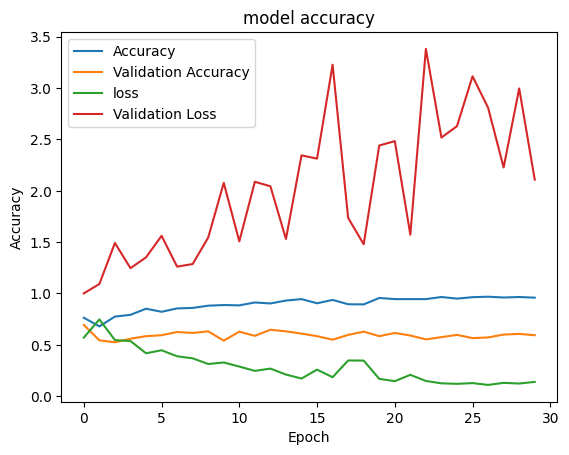

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()